## 定義問題: 不同年齡首次出門時間有何差異？

## 資料擷取 (CSV)

In [2]:
import pandas as pd
df = pd.read_csv("Sample1_data.csv",encoding = "utf-8")
df

,year,go_out_time
0,3,1
1,7,5
2,1,2
3,4,1
4,2,1
5,6,1
6,6,3
7,4,2
8,4,9
9,5,3


## 預處理: 資料清理、去除殘缺值

In [3]:
df = df[df.go_out_time != '#NULL!']     #remove empty item
df = df.astype(float)                   #traform into float type
df = df[df.go_out_time >= 1]            #remove out-range value
df = df[df.go_out_time <= 5]            #remove out-range value
df = df.reset_index(drop=True)          #reset index of df
df

,year,go_out_time
0,3,1
1,7,5
2,1,2
3,4,1
4,2,1
5,6,1
6,6,3
7,4,2
8,5,3
9,8,3


## 分析運算

In [4]:
#變數說明：
#year 1:15-未滿18歲, 2:18-未滿20歲, 3:20-未滿30歲, 4:30-未滿40歲, 5:40-未滿50歲, 6:50-未滿60歲, 7:60-未滿65歲, 8:65歲及以上
#go_out_time 1:7時以前, 2:7~9時以前, 3:9~17時以前, 4:17~19時以前, 5:19~22時以前, 6:22時以後, NULL:未填答

#tranform questionnaire item into a countable number
for i in range(len(df['go_out_time'])):
    if(df['go_out_time'][i]==1): df['go_out_time'][i] = 6
    elif(df['go_out_time'][i]==2): df['go_out_time'][i] = 8
    elif(df['go_out_time'][i]==3): df['go_out_time'][i] = 13
    elif(df['go_out_time'][i]==4): df['go_out_time'][i] = 18
    elif(df['go_out_time'][i]==5): df['go_out_time'][i] = 20.5
    elif(df['go_out_time'][i]==6): df['go_out_time'][i] = 23
    else: df['go_out_time'][i] = -1
        
grouped = df['go_out_time'].groupby(df['year']).mean() #Compute avg time of different year

## 視覺化

<Container object of 8 artists>

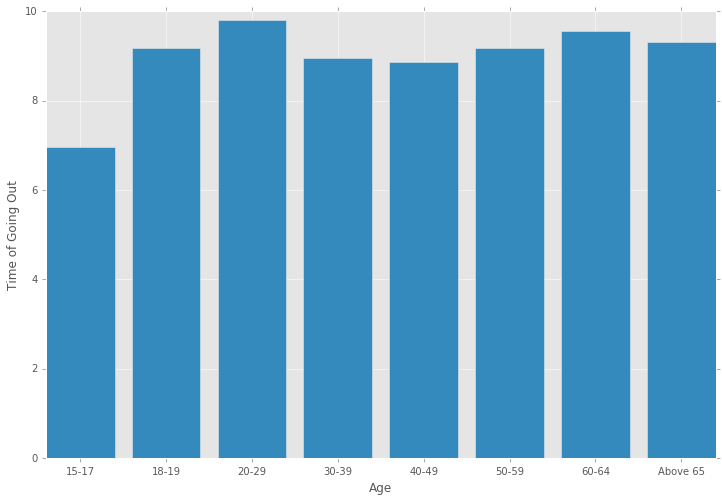

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig = plt.figure(figsize=(12,8))
y = grouped.tolist()
y = [ '%.2f' % elem for elem in y ]
x = [1,2,3,4,5,6,7,8]
x_label = ['15-17', '18-19', '20-29', '30-39', '40-49', '50-59', '60-64', 'Above 65']
plt.xlabel('Age')
plt.ylabel('Time of Going Out')
plt.xticks(x, x_label)
plt.bar(x,y,align='center')